In [1]:
#All the codes in this file are retrieved from Social Media and Network Analytics, Lab Notes, except for the codes from analysis part that come from the author
# importing packages and nltk data libraries
import string
import json
import codecs
import re
import RedditProcessing
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import ngrams
nltk.download('vader_lexicon')
f
rom colorama import Fore, Back, Style
import pandas as pd
import matplotlib.pyplot as plt
import json
import pandas as pd
from nltk import ngrams
from collections import Counter

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
%load_ext autoreload
%autoreload 1

%aimport RedditProcessing

In [3]:
redditfile = 'Running_for_MentalHealth.json'
redditFile = 'Running_for_MentalHealth.json'

## N-grams - Bigrams

In [5]:
# From Social Media and Network Analytics, Lab Notes 
tweetTokeniser = nltk.tokenize.TweetTokenizer()
lPunct = list(string.punctuation)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['rt', 'via', '..', '...', '"', "'", '`', '’', 'http', 'https']

tweetLemmatizer = nltk.stem.WordNetLemmatizer()
all_bigrams = []

def processText(text, tweetTokeniser, tweetLemmatizer, lStopwords):
    tokens = tweetTokeniser.tokenize(text.lower())  
    return [tweetLemmatizer.lemmatize(token) for token in tokens if token not in lStopwords and not token.isdigit()]

In [6]:
#From the author and Social Media and Network Analytics, Lab Notes 

# Tweet tokenizer
tweetTokeniser = nltk.tokenize.TweetTokenizer()
lPunct = list(string.punctuation)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['rt', 'via', '..', '...', '"', "'", '`', '’', 'http', 'https']

tweetLemmatizer = nltk.stem.WordNetLemmatizer()
all_bigrams = []


def processText(text, tweetTokeniser, tweetLemmatizer, lStopwords):
    tokens = tweetTokeniser.tokenize(text.lower()) 
    return [tweetLemmatizer.lemmatize(token) for token in tokens if token not in lStopwords and not token.isdigit()]

# Load data
with open(redditFile, 'r', encoding='utf-8') as f:
    redditDump = json.load(f)

for submission in redditDump['submissions']:
    postDate = pd.to_datetime(submission['created'], unit='s')

    title_text = submission.get('title', '')
    title_text = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
    lTokens_title = processText(title_text, tweetTokeniser, tweetLemmatizer, lStopwords)

    all_comment_tokens = []
    for comment in submission.get('comments', []):
        comment_text = comment.get('body', '')
        comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
        tokens = processText(comment_text, tweetTokeniser, tweetLemmatizer, lStopwords)
        all_comment_tokens.extend(tokens)

    combined_tokens = lTokens_title + all_comment_tokens

    bigrams = list(ngrams(combined_tokens, 2))
    all_bigrams.extend(bigrams)

bigram_counts = Counter(all_bigrams)

print("\nTop 50 Most Common Bigrams:")
for bigram, count in bigram_counts.most_common(50):
    print(f"{bigram}: {count}")



Top 50 Most Common Bigrams:
('feel', 'like'): 711
('long', 'run'): 587
('half', 'marathon'): 318
('first', 'marathon'): 300
('mental', 'health'): 224
('race', 'day'): 211
('good', 'luck'): 197
('started', 'running'): 166
('sound', 'like'): 155
('last', 'year'): 154
('heart', 'rate'): 153
('feel', 'better'): 150
('easy', 'run'): 144
('get', 'back'): 144
('make', 'feel'): 142
('make', 'sure'): 140
('feel', 'good'): 139
('marathon', 'training'): 139
('year', 'ago'): 136
('race', 'report'): 133
('training', 'plan'): 130
('strength', 'training'): 128
('rest', 'day'): 126
('run', 'mile'): 120
('first', 'half'): 113
('run', 'feel'): 110
('keep', 'going'): 101
('every', 'day'): 100
('take', 'time'): 99
('able', 'run'): 98
('per', 'week'): 96
('day', 'week'): 92
('go', 'run'): 91
('much', 'better'): 89
('even', 'though'): 87
('felt', 'like'): 87
('back', 'running'): 80
('get', 'better'): 80
('mile', 'run'): 80
('feeling', 'like'): 76
('training', 'block'): 76
('training', 'run'): 75
('one', 't

In [7]:
#From the author and Social Media and Network Analytics, Lab Notes 

tweetTokeniser = nltk.tokenize.TweetTokenizer()
lPunct = list(string.punctuation)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['rt', 'via', '..', '...', '"', "'", '`', '’', 'http', 'https']

tweetLemmatizer = nltk.stem.WordNetLemmatizer()
all_trigrams = []  # Store trigrams

def processText(text, tweetTokeniser, tweetLemmatizer, lStopwords):
    tokens = tweetTokeniser.tokenize(text.lower()) 
    return [tweetLemmatizer.lemmatize(token) for token in tokens if token not in lStopwords and not token.isdigit()]

# Load data
with open(redditFile, 'r', encoding='utf-8') as f:
    redditDump = json.load(f)

for submission in redditDump['submissions']:
    postDate = pd.to_datetime(submission['created'], unit='s')

    title_text = submission.get('title', '')
    title_text = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
    lTokens_title = processText(title_text, tweetTokeniser, tweetLemmatizer, lStopwords)

    all_comment_tokens = []
    for comment in submission.get('comments', []):
        comment_text = comment.get('body', '')
        comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
        tokens = processText(comment_text, tweetTokeniser, tweetLemmatizer, lStopwords)
        all_comment_tokens.extend(tokens)

    combined_tokens = lTokens_title + all_comment_tokens

    trigrams = list(ngrams(combined_tokens, 3))
    all_trigrams.extend(trigrams)

trigram_counts = Counter(all_trigrams)


print("\nTop 30 Most Common Tri-grams:")
for trigrams, count in trigram_counts.most_common(30):
    print(f"{trigrams}: {count}")



Top 30 Most Common Tri-grams:
('feel', 'like', 'im'): 39
('first', 'half', 'marathon'): 36
('make', 'feel', 'better'): 35
('mile', 'per', 'week'): 29
('mile', 'long', 'run'): 27
('run', 'feel', 'like'): 27
('nike', 'run', 'club'): 26
('ran', 'first', 'marathon'): 26
('feel', 'like', 'need'): 23
('feel', 'like', 'running'): 23
('feel', 'much', 'better'): 20
('dont', 'feel', 'like'): 19
('physical', 'mental', 'health'): 19
('crossing', 'finish', 'line'): 18
('get', 'back', 'running'): 18
('half', 'marathon', 'race'): 17
('training', 'first', 'marathon'): 17
('run', 'half', 'marathon'): 17
('run', 'long', 'run'): 17
('marathon', 'race', 'report'): 16
('feel', 'like', 'could'): 16
('make', 'feel', 'good'): 16
('one', 'foot', 'front'): 16
('mental', 'health', 'issue'): 16
('make', 'feel', 'like'): 15
('feel', 'like', 'youre'): 15
('run', 'walk', 'interval'): 15
('long', 'run', 'mile'): 15
('long', 'run', 'week'): 15
('feel', 'like', 'shit'): 14


## Approach 1 - Word Counting

In [9]:
#From Social Media and Network Analytics, Lab Notes 
def computeSentiment(lTokens, setPosWords, setNegWords):
    """
    Compute the overall sentiment of the list of tokens in lTokens, using the countWordSentimentAnalysis approach.
    
    @param lTokens: List of tokens to calculate the overall sentiment for.
    @param setPosWords: Set of positive words.
    @param setNegWords: Set of negative words.
    
    @returns Sentiment score for lTokens.
    """           
    posNum = len([tok for tok in lTokens if tok in setPosWords])


    negNum = len([tok for tok in lTokens if tok in setNegWords])

    sentiment = posNum - negNum
                
    return sentiment

In [10]:
def printColouredTokens(lTokens, setPosWords, setNegWords, sentiment):
    """
    Print out the tokens in different colours, according to sentiment.
    If positive, in red.
    If negative, in blue.
    Otherwise no colouring.
    
    @param lTokens: List of tokens to print and colour.
    @param setPosWords: Set of positive words.
    @param setNegWords: Set of negative words.
    @param sentiment: Sentiment score of list of tokens.
    """
        
    for token in lTokens:
        if token in setPosWords:
            print(Fore.RED + token + ', ', end='')
        elif token in setNegWords:
            print(Fore.BLUE + token + ', ', end='')
        else:
            print(Style.RESET_ALL + token + ', ', end='')

    print(': {}'.format(sentiment))
    

In [11]:
#From the author and Social Media and Network Analytics, Lab Notes 

def countWordSentimentAnalysis(setPosWords, setNegWords, sTweetsFilename, bPrint, processText):
    """
    Perform basic sentiment analysis on Reddit data (title + comments).

    @param setPosWords: set of positive sentiment words
    @param setNegWords: set of negative sentiment words
    @param sTweetsFilename: name of input file containing a JSON-formatted dump
    @param bPrint: whether to print the stream of tokens and sentiment (uses colorama)
    @param redditProcessor: RedditProcessing object, used to pre-process each piece of text

    @returns: list of reddit posts in the format [date, sentiment]
    """
    lSentiment_count = []
    sentAnalyser = SentimentIntensityAnalyzer()

    # Load Reddit data
    with open(sTweetsFilename, 'r', encoding='utf-8') as f:
        redditDump = json.load(f)

        for submission in redditDump['submissions']:
            postDate = pd.to_datetime(submission['created'], unit='s')

            title_text = submission.get('title', '')
            title_text = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
            lTokens_title = processText(title_text, tweetTokeniser, tweetLemmatizer, lStopwords)
            sentiment_title = computeSentiment(lTokens_title, setPosWords, setNegWords)
            lSentiment_count.append([postDate, sentiment_title])
            

            if bPrint:
                printColouredTokens(lTokens_title, setPosWords, setNegWords, sentiment_title)

            all_comment_tokens = []
            for comment in submission.get('comments', []):
                comment_text = comment.get('body', '')
                comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
                lTokens_comment = processText(comment_text, tweetTokeniser, tweetLemmatizer, lStopwords)
                sentiment_comment = computeSentiment(lTokens_comment, setPosWords, setNegWords)
                lSentiment_count.append([postDate, sentiment_comment])

                if bPrint:
                    printColouredTokens(lTokens_comment, setPosWords, setNegWords, sentiment_comment)

    return lSentiment_count

## Approach 2 - Vader

In [13]:
#From Social Media and Network Analytics, Lab Notes 
def vaderPrintTokens(dSentimentScores):
    """
    Print out the tokens and sentiment score.
    
    @param lTokens: List of tokens to print and colour.
    @dSentimentScores: Dictionary of sentiment from Vader.

    """
    print(*lTokens, sep=', ')
    for cat,score in dSentimentScores.items():
        print('{0}: {1}, '.format(cat, score), end='')
    print()

In [14]:
#From Social Media and Network Analytics, Lab Notes 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def vaderSentimentAnalysis(sTweetsFilename, bPrint=False):
    """
    Use VADER lexicon for sentiment analysis on Reddit data.

    @param sTweetsFilename: name of input file containing a JSON-formatted Reddit dump
    @param bPrint: whether to print text and sentiment scores

    @returns: list of Reddit posts in the format [date, sentiment_score]
    """
    sentAnalyser = SentimentIntensityAnalyzer()
    lSentiment_vader = []

    # Load Reddit data
    with open(sTweetsFilename, 'r', encoding='utf-8') as f:
        redditDump = json.load(f)

        for submission in redditDump['submissions']:
            postDate = pd.to_datetime(submission['created'], unit='s')

            # ----- VADER on raw submission title -----
            title_text = submission.get('title', '')
            title_text_clean = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
            dSentimentScores = sentAnalyser.polarity_scores(title_text_clean)
            lSentiment_vader.append([postDate, dSentimentScores['compound'], title_text_clean])

            if bPrint:
                print(f"[Title] {title_text_clean}")
                print("Sentiment:", dSentimentScores)

            # ----- VADER on each comment -----
            for comment in submission.get('comments', []):
                comment_text = comment.get('body', '')
                comment_clean = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
                dSentimentScores = sentAnalyser.polarity_scores(comment_clean)
                lSentiment_vader.append([postDate, dSentimentScores['compound'], comment_clean])

                if bPrint:
                    print(f"[Comment] {comment_clean}")
                    print("Sentiment:", dSentimentScores)

    return lSentiment_vader

In [15]:
# input file of set of postive words
posWordFile = 'positive-words.txt'
# input file of set of negative words
negWordFile = 'negative-words.txt'
# input file of set of reddit posts (json format)
redditFile = 'Running_for_MentalHealth.json'
# flag to determine whether to print out tweets and their sentiment
flagPrint = True
# specify the approach to take, one of [count, vader]
# change this to use a different sentiment approach
approach = 'vader'

In [16]:
lPosWords = []
with open(posWordFile, 'r', encoding='utf-8', errors='ignore') as fPos:
    lPosWords = [line.strip() for line in fPos]
setPosWords = set(lPosWords)

lNegWords = []
with codecs.open(negWordFile, 'r', encoding='utf-8', errors='ignore') as fNeg:
    lNegWords = [line.strip() for line in fNeg]
setNegWords = set(lNegWords)

In [17]:
#Show result - # because the result is too long and the screen is frozen
with open(redditFile, 'r') as f:
    redditData = json.load(f)

lSentiment = []
if approach == 'count':
    lSentiment_count = countWordSentimentAnalysis(setPosWords, setNegWords, redditFile, flagPrint, processText)
elif approach == 'vader':
    lSentiment_vader = vaderSentimentAnalysis(redditFile, flagPrint)

[Title] My fix for posterior shin splints in less than a month without taking time off or decreasing my training volume
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
[Comment] Actual shin splints (MTSS) are a bone stress issue that requires deloading. True shin splints typically get worse during a run, not better as you warm up. What you described sounds more like a posterior tibialis tendon issue, which responds well to the strengthening approach you took. The calf raises specifically target this tendon. Smart fixes for tendinopathy, but different problem than classic shin splints.
Sentiment: {'neg': 0.128, 'neu': 0.723, 'pos': 0.149, 'compound': -0.1171}
[Title] Scratching the itch of needing to be challenged
Sentiment: {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.1027}
[Comment] Do you live anywhere trails? I used to get that itch a lot too - part high T, part undiagnosed ADHD - and I found trails and multi days the best thing. Something about the plann

## For Analysis Part

In [19]:
# Run overall sentiment analysis
lSentiment_vader = vaderSentimentAnalysis('Running_for_MentalHealth.json', bPrint=False)

# Extract compound scores
compound_scores = [entry[1] for entry in lSentiment_vader]

if compound_scores:
    overall_sentiment = sum(compound_scores) / len(compound_scores)
    print(f"Overall Sentiment Score: {overall_sentiment:.4f}")

    if overall_sentiment >= 0.05:
        label = "Positive"
    elif overall_sentiment <= -0.05:
        label = "Negative"
    else:
        label = "Neutral"
    
    print(f"Overall Sentiment: {label}")
else:
    print("No sentiment scores available.")

Overall Sentiment Score: 0.3989
Overall Sentiment: Positive


In [20]:
lSentiment_vader = vaderSentimentAnalysis("Running_for_MentalHealth.json")

sorted_by_sentiment = sorted(lSentiment_vader, key=lambda x: x[1], reverse=True)

top3_positive = sorted_by_sentiment[:3]

top3_negative = sorted(lSentiment_vader, key=lambda x: x[1])[:3]


In [21]:
# Display Top 3 Positive Sentiments
print("\nTop 3 Positive Sentiments:")
for i, entry in enumerate(top3_positive, 1):
    date, score, text = entry
    print(f"{i}. Date: {date} | Compound Score: {score:.4f}")
    print(f"   Text: {text}\n")

# Display Top 3 Negative Sentiments
print("Top 3 Negative Sentiments:")
for i, entry in enumerate(top3_negative, 1):
    date, score, text = entry
    print(f"{i}. Date: {date} | Compound Score: {score:.4f}")
    print(f"   Text: {text}\n")


Top 3 Positive Sentiments:
1. Date: 2025-03-17 10:03:17 | Compound Score: 0.9996
   Text: Running faster over shorter distances gets harder as we age, maybe that's more anecdotal but it definitely requires more work.

To run faster over shorter distances requires faster workouts, faster training runs, maybe a mix of volume based workouts 10x 1k or 20x400 on shorter rest but a slower avg pace as well as some faster turnover workouts.

Being in your thirties and wanting to run fast doesn't make you delusional but if you don't do the recovery work, you'll definitely notice it sooner than if you were a young'n.  

For your training, I think your times are fine.  Ultimately running is about consistency.  It's better to run 6 months at 70 km's a month than 2-3 at 100 and then be injured or too tired for a month and then come back and try to jump in again.  

But the questions I have for you is if you ever increase your kilometerage over time and what exactly it is you're training for?  What

In [22]:
df = pd.read_json('Running_for_MentalHealth.json')

print(df.head())

                                         submissions
0  {'subreddit': 'running', 'title': 'My fix for ...
1  {'subreddit': 'running', 'title': 'Scratching ...
2  {'subreddit': 'running', 'title': 'Zone 2 Trai...
3  {'subreddit': 'running', 'title': 'Altitude Ad...
4  {'subreddit': 'running', 'title': 'Effort comp...


In [23]:
with open('Running_for_MentalHealth.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.json_normalize(data['submissions'])

vader = SentimentIntensityAnalyzer()

In [24]:
with open('Running_for_MentalHealth.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.json_normalize(data['submissions'])

def processText(text):
    text = re.sub(r"[^\w\s]", "", text.lower()) 
    return text.split()

def word_count_sentiment(text):
    tokens = processText(str(text))
    pos_count = sum(1 for word in tokens if word in posWordFile)
    neg_count = sum(1 for word in tokens if word in negWordFile)
    total = len(tokens)
    return pd.Series({'pos_count': pos_count, 'neg_count': neg_count, 'total_words': total})

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pos_words = []
neg_words = []
neutral_words = []

posWordFile = 'positive-words.txt'
negWordFile = 'negative-words.txt'

with open('positive-words.txt', 'r', encoding='ISO-8859-1') as f:
    posWordFile = set(
        line.strip().lower()
        for line in f
        if line.strip() and not line.startswith(';')
    )

# Load negative words
with open('negative-words.txt', 'r', encoding='ISO-8859-1') as f:
    negWordFile = set(
        line.strip().lower()
        for line in f
        if line.strip() and not line.startswith(';')
    )

# Loop through each list of comments
for comment_list in df['comments']:
    for comment in comment_list:
        text = comment.get('body', '')
        tokens = processText(text)
        for word in tokens:
            if word in posWordFile:
                pos_words.append(word)
            elif word in negWordFile:
                neg_words.append(word)
            else:
                neutral_words.append(word)


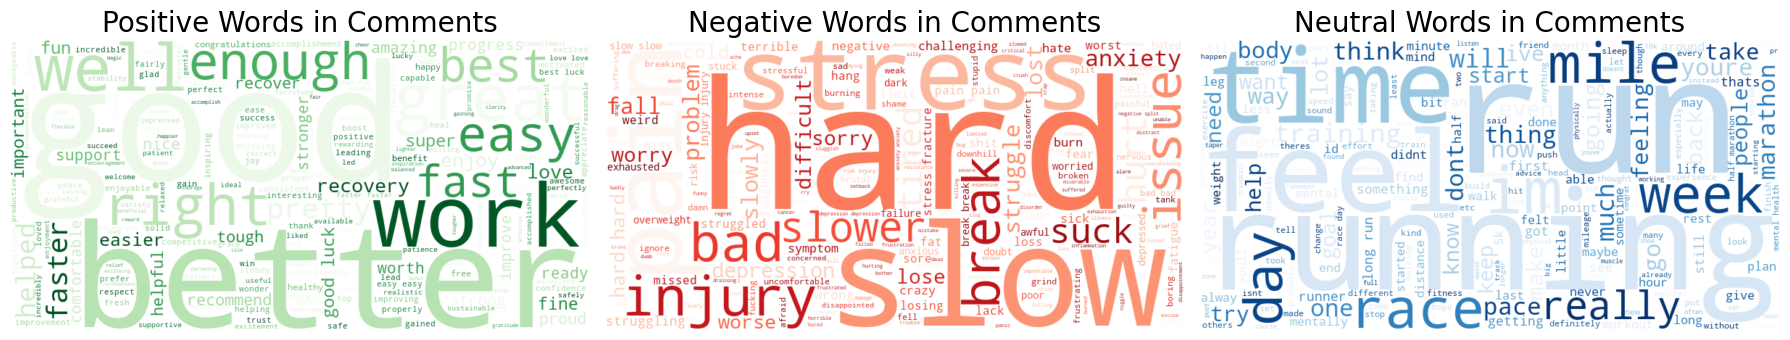

In [26]:
# Convert lists to strings
pos_text = " ".join(pos_words)
neg_text = " ".join(neg_words)
neutral_text = " ".join(neutral_words)

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(neg_text)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text)

plt.figure(figsize=(18, 12))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Words in Comments', fontsize=20)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Words in Comments', fontsize=20)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Words in Comments', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

In [27]:
# Example word count approach
text = """If you’re looking to build mental toughness (our lack of self-discipline is the #1 reason why we overindulge & get fat in the first place), check out #75Hard. It’s totally free & has a GREAT community around it. There’s a Reddit page & a Facebook group I’m pretty sure."""
# Process the sentence into tokens

def processText(text):
    text = re.sub(r"[^\w\s]", "", text.lower()) 
    return text.split()

tokens = processText(str(text))

pos_count = sum(1 for token in tokens if token in posWordFile)
neg_count = sum(1 for token in tokens if token in negWordFile)

print("Comment:", text)
print("Positive Word Count:", pos_count)
print("Negative Word Count:", neg_count)


Comment: If you’re looking to build mental toughness (our lack of self-discipline is the #1 reason why we overindulge & get fat in the first place), check out #75Hard. It’s totally free & has a GREAT community around it. There’s a Reddit page & a Facebook group I’m pretty sure.
Positive Word Count: 3
Negative Word Count: 3


## Visualization comparing two approaches of sentiment analysis

In [29]:
def vaderSentimentAnalysis(sTweetsFilename, bPrint=False):
    sentAnalyser = SentimentIntensityAnalyzer()
    lSentiment_vader = []

    with open(sTweetsFilename, 'r', encoding='utf-8') as f:
        redditDump = json.load(f)
        for submission in redditDump['submissions']:
            postDate = pd.to_datetime(submission['created'], unit='s')

            # ----- VADER on raw submission title -----
            title_text = submission.get('title', '')
            title_text_clean = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
            dSentimentScores = sentAnalyser.polarity_scores(title_text_clean)
            lSentiment_vader.append([postDate, dSentimentScores['compound']])

            # ----- VADER on each comment -----
            for comment in submission.get('comments', []):
                comment_text = comment.get('body', '')
                comment_clean = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
                dSentimentScores = sentAnalyser.polarity_scores(comment_clean)
                lSentiment_vader.append([postDate, dSentimentScores['compound']])

    return lSentiment_vader

In [30]:
def countWordSentimentAnalysis(setPosWords, setNegWords, sTweetsFilename, bPrint, processText):
    lSentiment_count = []
    sentAnalyser = SentimentIntensityAnalyzer()

    with open(sTweetsFilename, 'r', encoding='utf-8') as f:
        redditDump = json.load(f)

        for submission in redditDump['submissions']:
            postDate = pd.to_datetime(submission['created'], unit='s')

            title_text = submission.get('title', '')
            title_text = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
            lTokens_title = processText(title_text)
            sentiment_title = computeSentiment(lTokens_title, setPosWords, setNegWords)
            lSentiment_count.append([postDate, sentiment_title])

            all_comment_tokens = []
            for comment in submission.get('comments', []):
                comment_text = comment.get('body', '')
                comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
                lTokens_comment = processText(comment_text)
                sentiment_comment = computeSentiment(lTokens_comment, setPosWords, setNegWords)
                lSentiment_count.append([postDate, sentiment_comment])

    return lSentiment_count

/var/folders/k3/ppq5ys316sd1tn7_ctbkz1sw0000gn/T/ipykernel_86558/965774696.py:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_vader_resampled = df_vader.resample('Y').mean()
/var/folders/k3/ppq5ys316sd1tn7_ctbkz1sw0000gn/T/ipykernel_86558/965774696.py:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_count_resampled = df_count.resample('Y').mean()


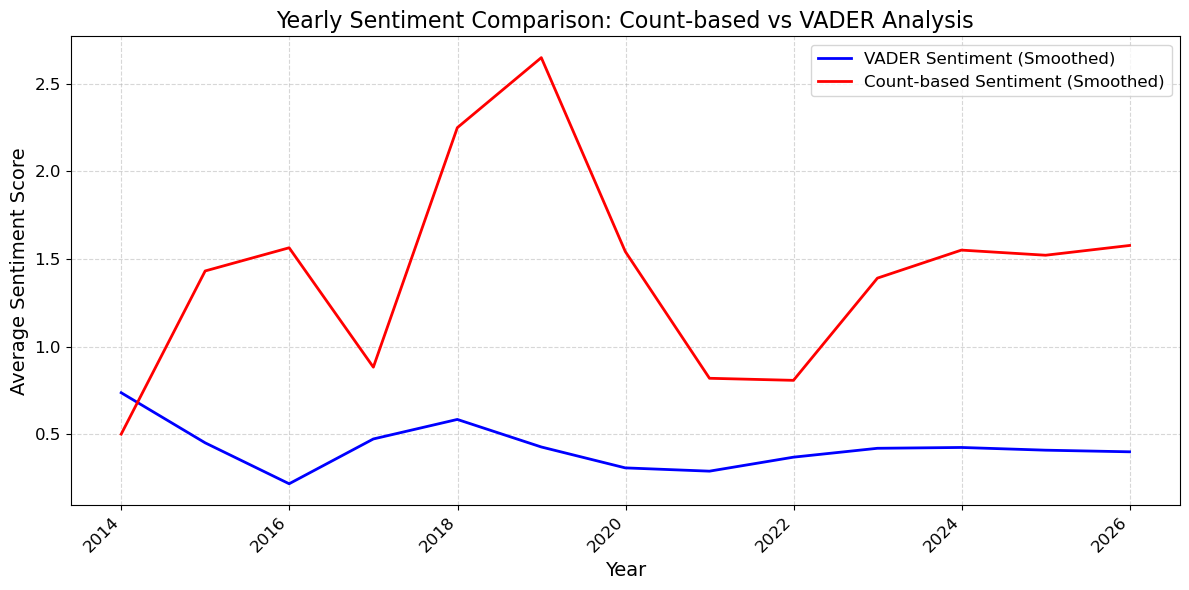

In [31]:
# Get sentiment data
lSentiment_vader = vaderSentimentAnalysis(redditFile, bPrint=False)
lSentiment_count = countWordSentimentAnalysis(setPosWords, setNegWords, redditFile, bPrint=False, processText=processText)

df_vader = pd.DataFrame(lSentiment_vader, columns=['date', 'sentiment'])
df_vader['date'] = pd.to_datetime(df_vader['date'])
df_vader.set_index('date', inplace=True)

df_count = pd.DataFrame(lSentiment_count, columns=['date', 'sentiment'])
df_count['date'] = pd.to_datetime(df_count['date'])
df_count.set_index('date', inplace=True)

df_vader_resampled = df_vader.resample('Y').mean()
df_count_resampled = df_count.resample('Y').mean()

df_vader_resampled['smoothed'] = df_vader_resampled['sentiment'].rolling(window=2, min_periods=1).mean()
df_count_resampled['smoothed'] = df_count_resampled['sentiment'].rolling(window=2, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_vader_resampled.index, df_vader_resampled['smoothed'], label='VADER Sentiment (Smoothed)', color='blue', linewidth=2)
plt.plot(df_count_resampled.index, df_count_resampled['smoothed'], label='Count-based Sentiment (Smoothed)', color='red', linewidth=2)

plt.title('Yearly Sentiment Comparison: Count-based vs VADER Analysis', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Sentiment Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/k3/ppq5ys316sd1tn7_ctbkz1sw0000gn/T/ipykernel_86558/1882939336.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_vader_resampled = df_vader.resample('M').mean()
/var/folders/k3/ppq5ys316sd1tn7_ctbkz1sw0000gn/T/ipykernel_86558/1882939336.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_count_resampled = df_count.resample('M').mean()


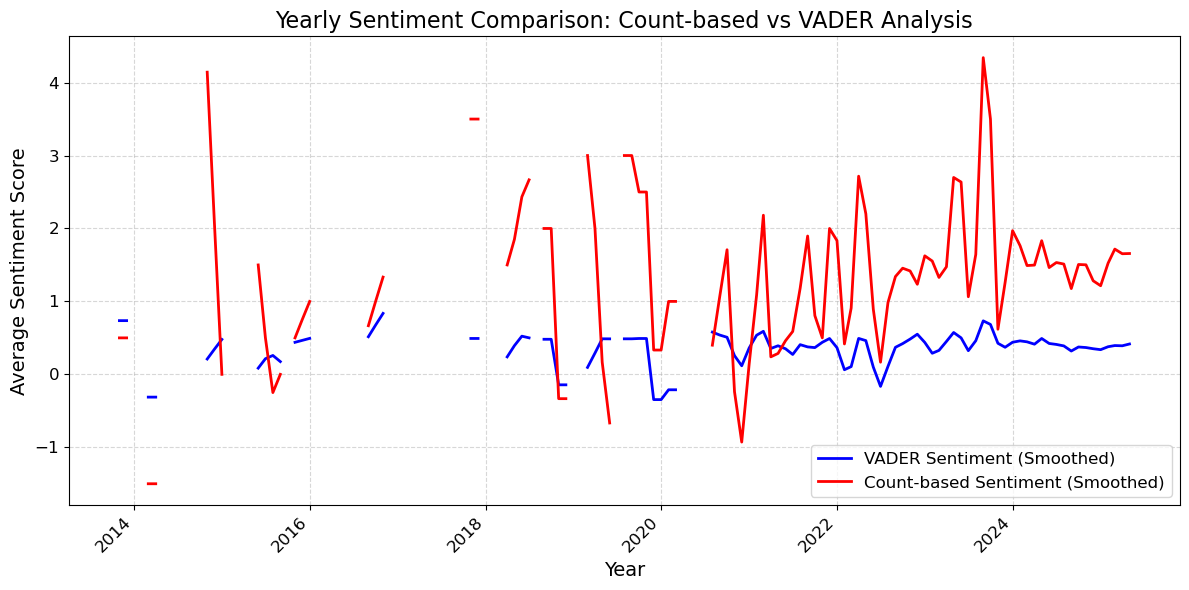

In [32]:
# Get sentiment data
lSentiment_vader = vaderSentimentAnalysis(redditFile, bPrint=False)
lSentiment_count = countWordSentimentAnalysis(setPosWords, setNegWords, redditFile, bPrint=False, processText=processText)

df_vader = pd.DataFrame(lSentiment_vader, columns=['date', 'sentiment'])
df_vader['date'] = pd.to_datetime(df_vader['date'])
df_vader.set_index('date', inplace=True)

df_count = pd.DataFrame(lSentiment_count, columns=['date', 'sentiment'])
df_count['date'] = pd.to_datetime(df_count['date'])
df_count.set_index('date', inplace=True)

df_vader_resampled = df_vader.resample('M').mean()
df_count_resampled = df_count.resample('M').mean()

df_vader_resampled['smoothed'] = df_vader_resampled['sentiment'].rolling(window=2, min_periods=1).mean()
df_count_resampled['smoothed'] = df_count_resampled['sentiment'].rolling(window=2, min_periods=1).mean()
plt.figure(figsize=(12, 6))
plt.plot(df_vader_resampled.index, df_vader_resampled['smoothed'], label='VADER Sentiment (Smoothed)', color='blue', linewidth=2)
plt.plot(df_count_resampled.index, df_count_resampled['smoothed'], label='Count-based Sentiment (Smoothed)', color='red', linewidth=2)

plt.title('Yearly Sentiment Comparison: Count-based vs VADER Analysis', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Sentiment Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()